## Exploratory Data Analysis on IPL matches dataset(2008-2020)

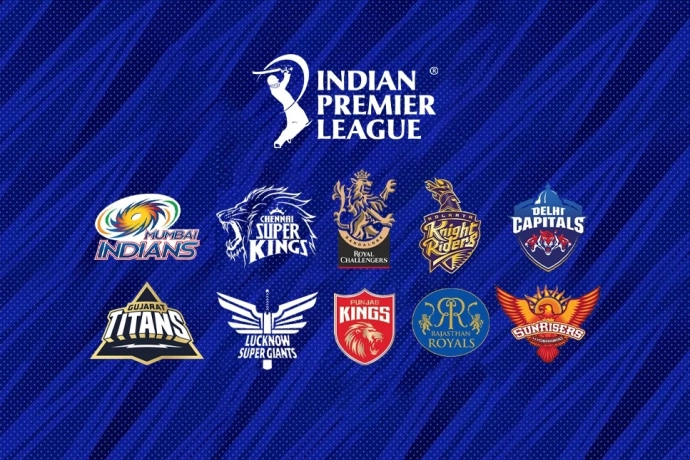

#Introduction<br>
  Indian Premier League is a biggest T-20 Cricket league,which takes place in India. I have details of all the matches from 2008 to 2020 in this data set. Here I will be analyzing the factors and patterns that helps team to win matches by using libraries of Python such as Numpy and Pandas for data manipulation and for visualization I have used Matplotlib, Seaborn and Plotly.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Transforming the data into DataFrame
df = pd.read_csv("/content/IPL Matches 2008-2020.csv")

In [3]:
df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [4]:
# To know the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [5]:
# Get statistical summary
df.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


## **Data Pre-Processing**

### **Finding Null values and dealing those values**

In [6]:
# Get the percentage of null values present in each column
df.isnull().sum().sort_values(ascending = False)/len(df) * 100

method             97.671569
result_margin       2.083333
city                1.593137
winner              0.490196
player_of_match     0.490196
eliminator          0.490196
result              0.490196
id                  0.000000
umpire1             0.000000
toss_winner         0.000000
toss_decision       0.000000
team2               0.000000
team1               0.000000
neutral_venue       0.000000
venue               0.000000
date                0.000000
umpire2             0.000000
dtype: float64

In [7]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [8]:
# Converting the date into datetime format
df["date"] = pd.to_datetime(df["date"])

In [9]:
# Creating new column year the dates
df["Year"] = df["date"].dt.year

In [10]:
# Creating new column month the dates
df["Month"] = df["date"].dt.month

In [11]:
# Creating new column day the dates
df["Day"] = df["date"].dt.day

In [12]:
# Creating new column weekday the dates
df["Weekday"] = df["date"].dt.weekday

In [13]:
# To know which columns does not have Numeric data 
# Columns with True are not having Numeric data
# Columns with False are having numeric data
df.isna().any()

id                 False
city                True
date               False
player_of_match     True
venue              False
neutral_venue      False
team1              False
team2              False
toss_winner        False
toss_decision      False
winner              True
result              True
result_margin       True
eliminator          True
method              True
umpire1            False
umpire2            False
Year               False
Month              False
Day                False
Weekday            False
dtype: bool

In [14]:
df.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
Year                 0
Month                0
Day                  0
Weekday              0
dtype: int64

In [15]:
# Checking the null values of city column
df[df["city"].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,result,result_margin,eliminator,method,umpire1,umpire2,Year,Month,Day,Weekday
399,729281,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,...,wickets,8.0,N,NaN,Aleem Dar,S Ravi,2014,4,17,3
402,729287,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,...,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary,2014,4,19,5
403,729289,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,...,wickets,4.0,N,NaN,Aleem Dar,VA Kulkarni,2014,4,19,5
404,729291,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,...,wickets,7.0,N,NaN,BF Bowden,M Erasmus,2014,4,20,6
406,729295,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,...,runs,72.0,N,NaN,M Erasmus,S Ravi,2014,4,22,1
407,729297,NaN,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,1,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,...,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth,2014,4,23,2
408,729299,NaN,2014-04-24,CA Lynn,Sharjah Cricket Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni,2014,4,24,3
409,729301,NaN,2014-04-25,AJ Finch,Dubai International Cricket Stadium,1,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,...,runs,4.0,N,NaN,M Erasmus,S Ravi,2014,4,25,4
410,729303,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,...,wickets,7.0,N,NaN,BF Bowden,M Erasmus,2014,4,25,4
413,729309,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,1,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,...,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni,2014,4,27,6


In [16]:
# Get the index of rows where city is  null when venue is Sharjah Cricket Stadium
df[(df["city"].isnull()) & (df["venue"] == "Sharjah Cricket Stadium")].index

Int64Index([399, 404, 406, 408, 413, 414], dtype='int64')

In [17]:
# Replacing the null values of city by Dubai where venue is Sharjah Cricket Stadium
for i in [399, 404, 406, 408, 413, 414]:
  df["city"][i] = "Sharjah"

In [18]:
# Get the index of rows where city is  null when venue is Dubai International Cricket Stadium
df[(df["city"].isnull()) & (df["venue"] == "Dubai International Cricket Stadium")].index

Int64Index([402, 403, 407, 409, 410, 415, 417], dtype='int64')

In [19]:
# Replacing the null values of city by Dubai where venue is Dubai International Cricket Stadium
for i in [402, 403, 407, 409, 410, 415, 417]:
  df["city"][i] = "Dubai"

In [20]:
df.isnull().sum()

id                   0
city                 0
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
Year                 0
Month                0
Day                  0
Weekday              0
dtype: int64

In [21]:
df["city"].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur', 'Bengaluru'],
      dtype=object)

In [22]:
# Get the null values present in the column player_of_match
df[df["player_of_match"].isnull()]


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,result,result_margin,eliminator,method,umpire1,umpire2,Year,Month,Day,Weekday
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,...,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker,2011,5,21,5
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,...,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak,2015,4,29,2
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,...,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan,2015,5,17,6
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,...,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong,2019,4,30,1


**Conclusion:** By the above output we can see these 4 rows don't have values for player_of_match, winner, result, result_margin so it is better to drop these 4 records

In [23]:
# Drop those 4 recors
df.drop([241,486,511,744], inplace=True)

In [24]:
df.isnull().sum()

id                   0
city                 0
date                 0
player_of_match      0
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               0
result               0
result_margin       13
eliminator           0
method             793
umpire1              0
umpire2              0
Year                 0
Month                0
Day                  0
Weekday              0
dtype: int64

In [25]:
# Check null values of result_margin
df[df["result_margin"].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,result,result_margin,eliminator,method,umpire1,umpire2,Year,Month,Day,Weekday
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,...,tie,NaN,Y,NaN,MR Benson,M Erasmus,2009,4,23,3
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,...,tie,NaN,Y,NaN,K Hariharan,DJ Harper,2010,3,21,6
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,...,tie,NaN,Y,NaN,AK Chaudhary,S Ravi,2013,4,7,6
341,598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,...,tie,NaN,Y,NaN,M Erasmus,VA Kulkarni,2013,4,16,1
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,...,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary,2014,4,29,1
476,829741,Ahmedabad,2015-04-21,SE Marsh,"Sardar Patel Stadium, Motera",0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,...,tie,NaN,Y,NaN,M Erasmus,S Ravi,2015,4,21,1
610,1082625,Rajkot,2017-04-29,KH Pandya,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,...,tie,NaN,Y,NaN,AK Chaudhary,CB Gaffaney,2017,4,29,5
705,1175365,Delhi,2019-03-30,PP Shaw,Feroz Shah Kotla,0,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,field,...,tie,NaN,Y,NaN,AY Dandekar,Nitin Menon,2019,3,30,5
746,1178426,Mumbai,2019-05-02,JJ Bumrah,Wankhede Stadium,0,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,...,tie,NaN,Y,NaN,CK Nandan,S Ravi,2019,5,2,3
757,1216493,Dubai,2020-09-20,MP Stoinis,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,...,tie,NaN,Y,NaN,AK Chaudhary,Nitin Menon,2020,9,20,6


In [26]:
# Replace the null values of result_margin column by 0
df["result_margin"].fillna(0, inplace = True)

In [27]:
df.isnull().sum()

id                   0
city                 0
date                 0
player_of_match      0
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               0
result               0
result_margin        0
eliminator           0
method             793
umpire1              0
umpire2              0
Year                 0
Month                0
Day                  0
Weekday              0
dtype: int64

In [28]:
# Check values of method column
df["method"].unique()

array([nan, 'D/L'], dtype=object)

In [29]:
# Replacing the null values of method column by "Usual_method"
df["method"].fillna("Usual_method", inplace = True)

In [30]:
df.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
method             0
umpire1            0
umpire2            0
Year               0
Month              0
Day                0
Weekday            0
dtype: int64

In [31]:
# Here we can see that M Chinnaswamy Stadium is duplicated as M.Chinnaswamy Stadium  
df.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [32]:
# Replacing the "M.Chinnaswamy Stadium" by "M Chinnaswamy Stadium"
for i in df["venue"]:
  if i == "M.Chinnaswamy Stadium":
    df["venue"].replace("M.Chinnaswamy Stadium", "M Chinnaswamy Stadium", inplace = True)

In [33]:
df["venue"].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

## Questions and Answers

**Question_1: How many matches played as per the dataset?**

In [34]:
# Total number of matches played 
df["id"].count()

812

- 812 matches have been played as per the data set

**Question_2: How many IPL season's data we have ?**

In [35]:
# To get year of seasons
df.Year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020])

In [36]:
# To get number of seasons
df.Year.nunique()

13

In [37]:
# Adding a new column Season
df['Season'] = df['Year']

In [38]:
df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'Year',
       'Month', 'Day', 'Weekday', 'Season'],
      dtype='object')

In [39]:
# Creating the list of season number
Season_Number = []
for i in df["Year"]:
  if i == 2008:
    Season_Number.append(1)
  elif i == 2009:
    Season_Number.append(2)
  elif i == 2010:
    Season_Number.append(3)
  elif i == 2011:
    Season_Number.append(4)
  elif i == 2012:
    Season_Number.append(5)
  elif i == 2013:
    Season_Number.append(6)
  elif i == 2014:
    Season_Number.append(7)
  elif i == 2015:
    Season_Number.append(8)
  elif i == 2016:
    Season_Number.append(9)
  elif i == 2017:
    Season_Number.append(10)
  elif i == 2018:
    Season_Number.append(11)
  elif i == 2019:
    Season_Number.append(12)
  elif i == 2020:
    Season_Number.append(13)
                   
    

In [40]:
df["Season_Number"] = Season_Number

In [41]:
df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2', 'Year',
       'Month', 'Day', 'Weekday', 'Season', 'Season_Number'],
      dtype='object')

- We have 13 seasons in the data set

**Question_3: Get the details of the match won by the  maximum margin of runs?**:

In [42]:
df.iloc[df["result_margin"].idxmax()]

id                                                   1082638
city                                               Hyderabad
date                                     2017-05-08 00:00:00
player_of_match                                     S Dhawan
venue              Rajiv Gandhi International Stadium, Uppal
neutral_venue                                              0
team1                                    Sunrisers Hyderabad
team2                                         Mumbai Indians
toss_winner                                   Mumbai Indians
toss_decision                                            bat
winner                                   Sunrisers Hyderabad
result                                               wickets
result_margin                                            7.0
eliminator                                                 N
method                                          Usual_method
umpire1                                KN Ananthapadmanabhan
umpire2                 

**Question_4: Which season consisted of the highest number of matches ever played?**

In [43]:
df.Season.value_counts().sort_values(ascending = False )

2013    76
2012    74
2011    72
2010    60
2014    60
2016    60
2018    60
2020    60
2017    59
2019    59
2008    58
2009    57
2015    57
Name: Season, dtype: int64

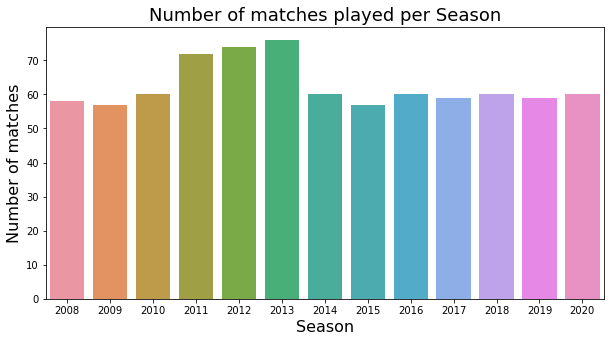

In [44]:
plt.figure(figsize = (10,5))
sns.countplot(df.Season)
plt.xlabel("Season", fontsize = 16)
plt.ylabel("Number of matches",fontsize = 16 )
plt.title("Number of matches played per Season", fontsize = 18)
plt.show()

- Season number 6 that held in 2013 has most number of matches played followed by  season number 5 ,2012

**Question_5: Find the number of matches played by each team ?**

In [45]:
# Creating the variable list as matches and converting that into Series
matches = list(df["team1"]) + list(df["team2"])
matches = pd.Series(matches)

In [46]:
matches_df = pd.DataFrame(matches)

In [47]:
# Number of matches played by each team
matches.value_counts().sort_values(ascending = False)

Mumbai Indians                 203
Royal Challengers Bangalore    192
Kolkata Knight Riders          192
Kings XI Punjab                190
Chennai Super Kings            178
Delhi Daredevils               159
Rajasthan Royals               159
Sunrisers Hyderabad            124
Deccan Chargers                 75
Pune Warriors                   45
Delhi Capitals                  33
Gujarat Lions                   30
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
dtype: int64

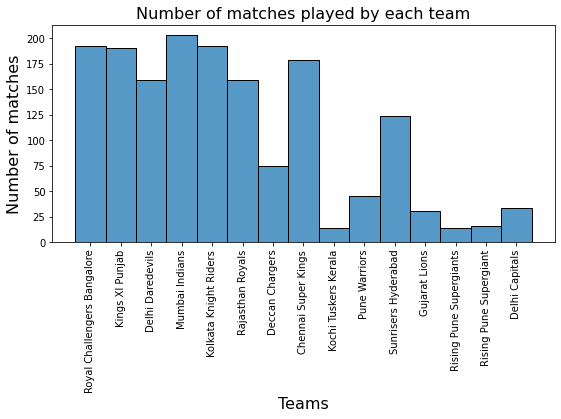

In [48]:
plt.figure(figsize=(9,4))
sns.histplot(matches)
plt.xticks(rotation = 90)
plt.xlabel("Teams", fontsize = 16)
plt.ylabel("Number of matches", fontsize = 16)
plt.title("Number of matches played by each team", fontsize = 16)
plt.show()

In [49]:
plx.histogram(matches, width = 800, height = 400, labels = {"value" : "Teams", "count" : "Number_of_matches"}, title = "Number of matches played by each team")



- Most number  of matches played by the team Mumbai indians followed by Royal Challengers Bangalore and Kolkata Knight Riders 

**Question_6: Which is the most successful team?**

In [50]:
df.winner.value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

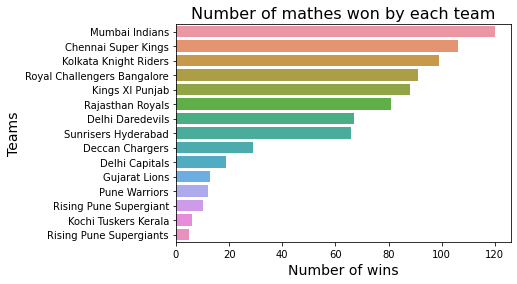

In [51]:
sns.barplot( x = df.winner.value_counts(), y = df.winner.value_counts().index)
plt.xlabel("Number of wins", fontsize = 14)
plt.ylabel("Teams",fontsize = 14)
plt.title("Number of mathes won by each team", fontsize = 16)
plt.show()

In [52]:
import plotly.express as plx

In [53]:
plx.bar(df.winner.value_counts(), labels={"index": "Teams", "value":"Number of matches won"})


- Most number of matches won by Mumbai Indians followed by Chennai Super Kings















**Question_7: Get the Highest wins by teams per season**

In [54]:
df.groupby(df["Season"])["winner"].value_counts()

Season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2020    Kolkata Knight Riders           7
        Royal Challengers Bangalore     7
        Chennai Super Kings             6
        Kings XI Punjab                 6
        Rajasthan Royals                6
Name: winner, Length: 108, dtype: int64

**Question_8: Find top ten players who got maximum number of player of the match?**

In [55]:
df.player_of_match.value_counts().sort_values(ascending = False)[:10]

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
SR Watson         16
YK Pathan         16
SK Raina          14
V Kohli           13
G Gambhir         13
Name: player_of_match, dtype: int64

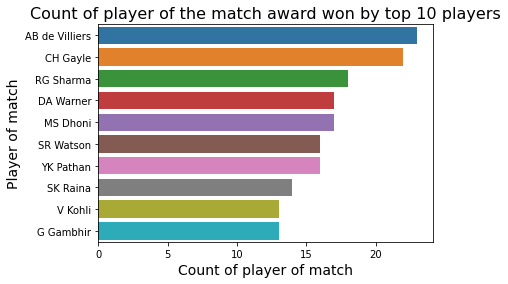

In [56]:
sns.barplot( x = df["player_of_match"].value_counts(ascending = False)[:10], y = df["player_of_match"].value_counts(ascending = False)[:10].index)
plt.xlabel("Count of player of match", fontsize = 14)
plt.ylabel("Player of match", fontsize = 14)
plt.title("Count of player of the match award won by top 10 players", fontsize = 16)
plt.show()

- **AB de Villers** has got most Player of the Match award followed by CH Gayle

**Question_9: How many number of matches played per city**

In [57]:
df["city"].value_counts().sort_values(ascending = False)

Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          63
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Dubai              33
Abu Dhabi          29
Sharjah            18
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cape Town           7
Cuttack             7
Ranchi              7
Port Elizabeth      7
Raipur              6
Kochi               5
Kanpur              4
Kimberley           3
Nagpur              3
East London         3
Bloemfontein        2
Name: city, dtype: int64

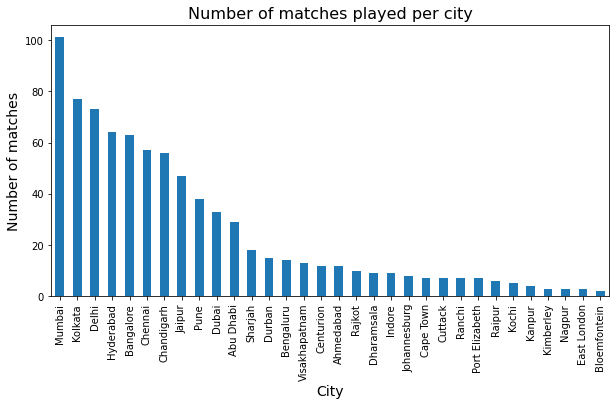

In [58]:
plt.figure(figsize=(10,5))
df["city"].value_counts().sort_values(ascending = False).plot(kind = "bar")
plt.xlabel("City", fontsize = 14)
plt.ylabel("Number of matches", fontsize = 14)
plt.title("Number of matches played per city", fontsize = 16)
plt.show()

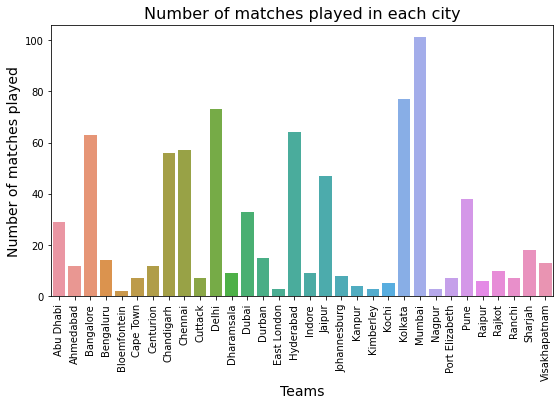

In [59]:
plt.figure(figsize=(9,5))
sns.countplot(df["city"].sort_values(ascending = True ))  # Sorting based on City names
plt.xticks(rotation = 90)
plt.xlabel("Teams", fontsize = 14)
plt.ylabel("Number of matches played", fontsize = 14)
plt.title("Number of matches played in each city", fontsize = 16)
plt.show()

- Mumbai has hosted most number of matches followed by Kolkata

**Question_10: Define a function to get total matches played by each team?**

In [60]:
def Total_match(team_name):
  count_match1 = 0
  for i in df["team1"]:
    if i == team_name:
      count_match1 += 1
  

  count_match2 = 0
  for j in df["team2"]:
    if j == team_name:
      count_match2 += 1
 

  print(count_match1  + count_match2)

In [61]:
Total_match("Mumbai Indians")

203


**Question_11: Compare the matches played and won for each team.**

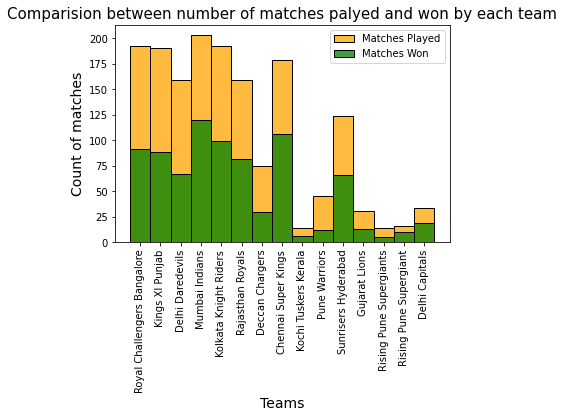

In [62]:
sns.histplot(matches, color = "orange")
sns.histplot(df['winner'], color='green')
plt.xticks(rotation=90)
plt.legend(['Matches Played','Matches Won'])
plt.xlabel('Teams', fontsize = 14)
plt.title("Comparision between number of matches palyed and won by each team", fontsize = 15)
plt.ylabel("Count of matches", fontsize = 14)
plt.show()

- Mumbai Indians has highest winning proportionality followed by Chennai Super Kings

**Question_12: Get team's winning proportion for each Year**

Year : 2008 -------------------------------------------


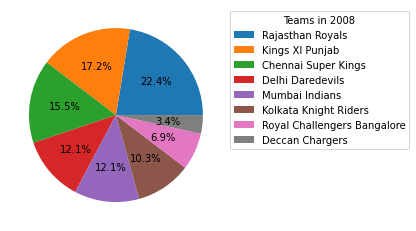

Year : 2009 -------------------------------------------


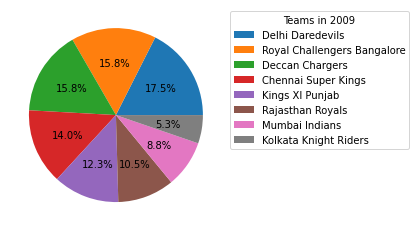

Year : 2010 -------------------------------------------


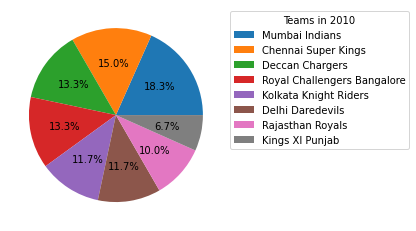

Year : 2011 -------------------------------------------


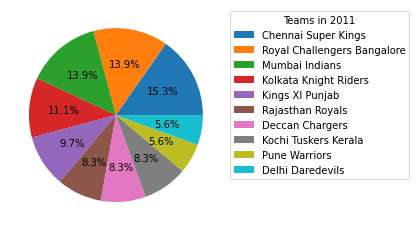

Year : 2012 -------------------------------------------


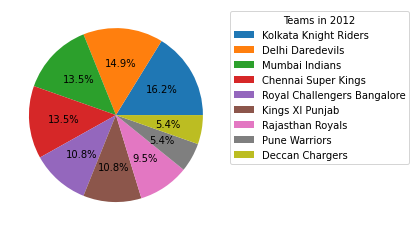

Year : 2013 -------------------------------------------


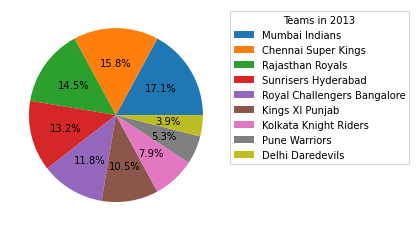

Year : 2014 -------------------------------------------


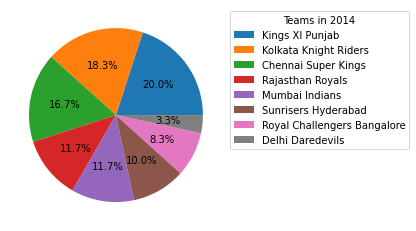

Year : 2015 -------------------------------------------


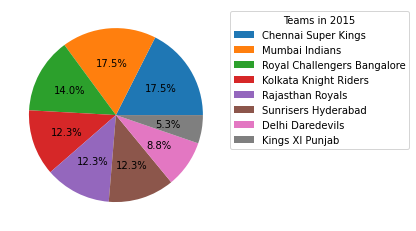

Year : 2016 -------------------------------------------


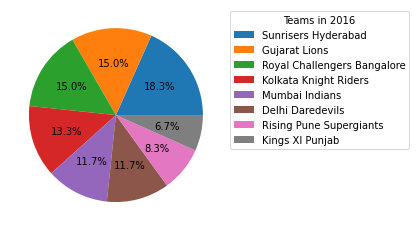

Year : 2017 -------------------------------------------


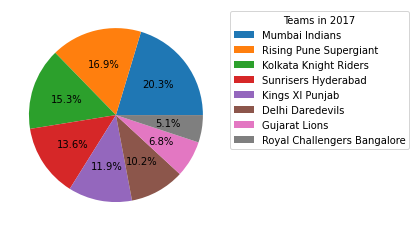

Year : 2018 -------------------------------------------


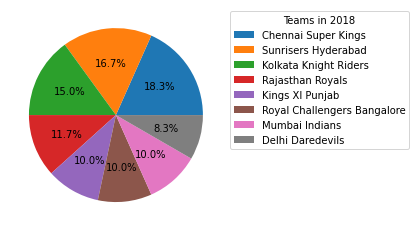

Year : 2019 -------------------------------------------


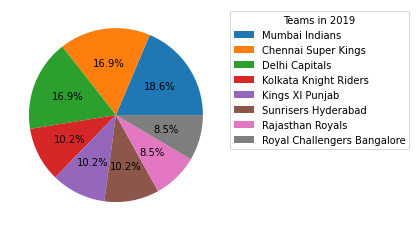

Year : 2020 -------------------------------------------


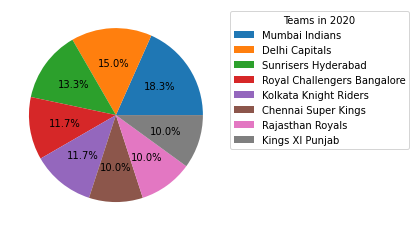

In [63]:
for i in df.Year.unique():
  print("Year :", i,"-------------------------------------------")
  plt.pie(df[df["Year"]== i]["winner"].value_counts(), autopct = "%1.1f%%")
  plt.legend(df[df["Year"]== i]["winner"].value_counts().index, bbox_to_anchor = (1,1),title='Teams in {}'.format(i) ) # The bbox_to_anchor argument is used to specify the precise placement of the legend.
  plt.show()

**Question_13: Get the percentage of wins for each team in all the venues**

Winner:  Kolkata Knight Riders


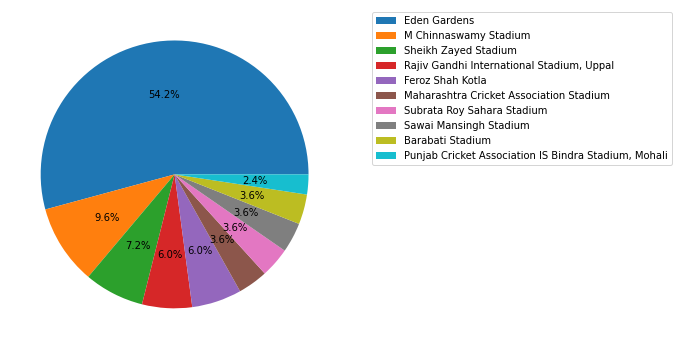

Winner:  Chennai Super Kings


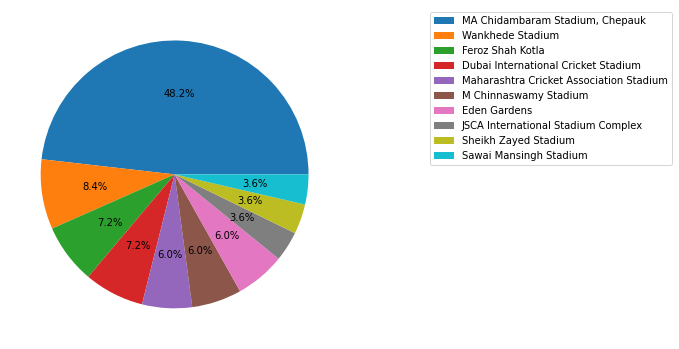

Winner:  Delhi Daredevils


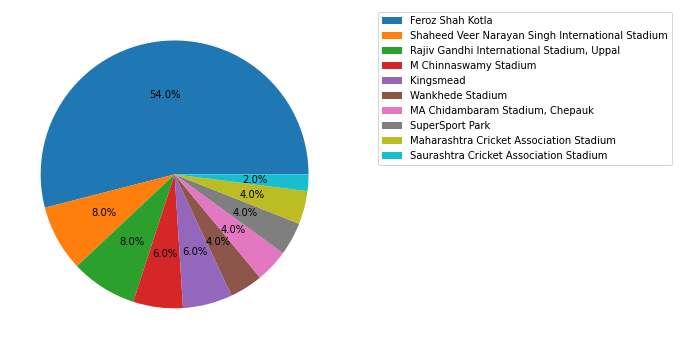

Winner:  Royal Challengers Bangalore


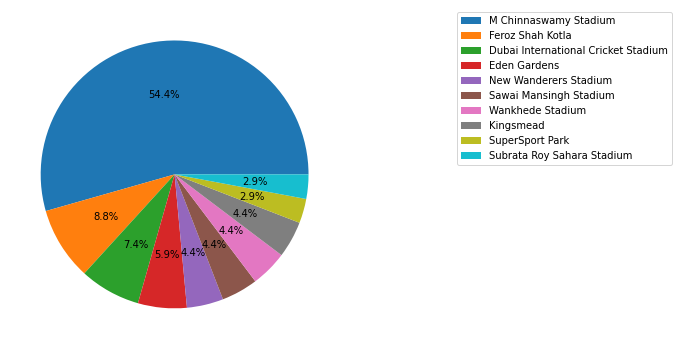

Winner:  Rajasthan Royals


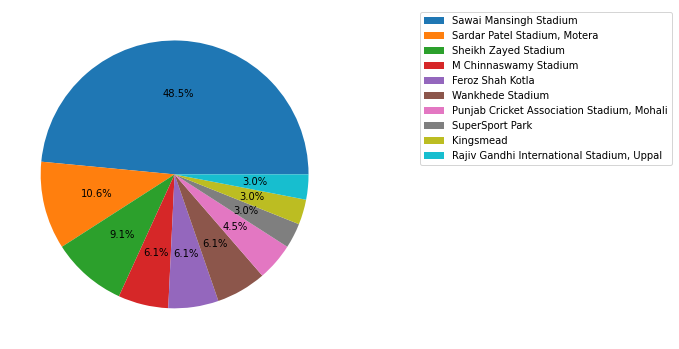

Winner:  Kings XI Punjab


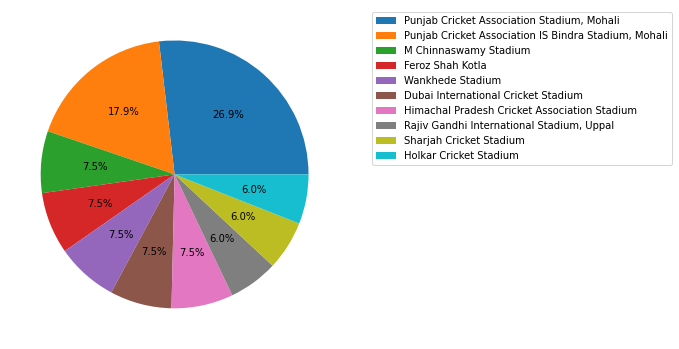

Winner:  Deccan Chargers


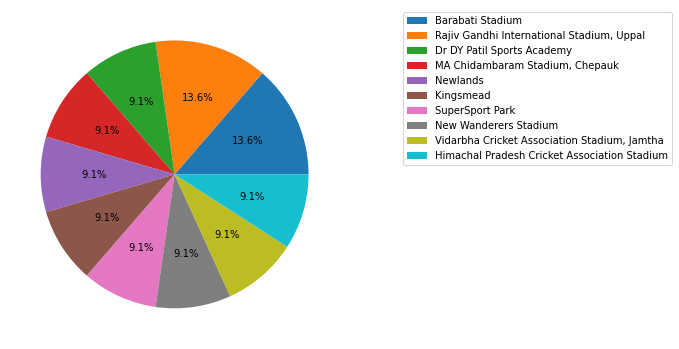

Winner:  Mumbai Indians


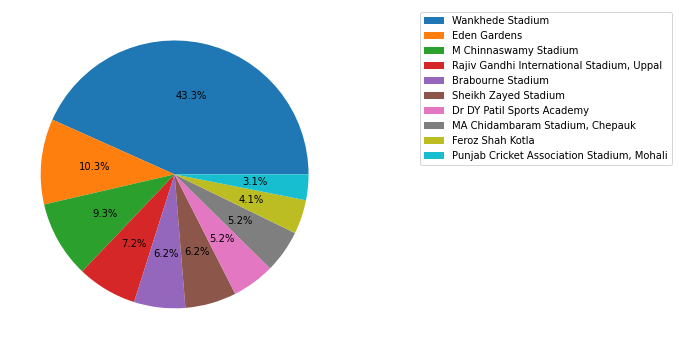

Winner:  Pune Warriors


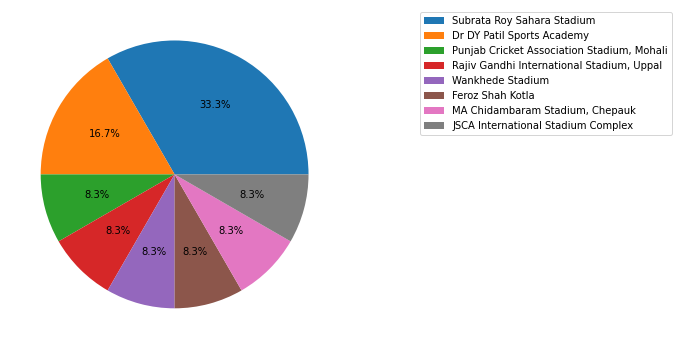

Winner:  Kochi Tuskers Kerala


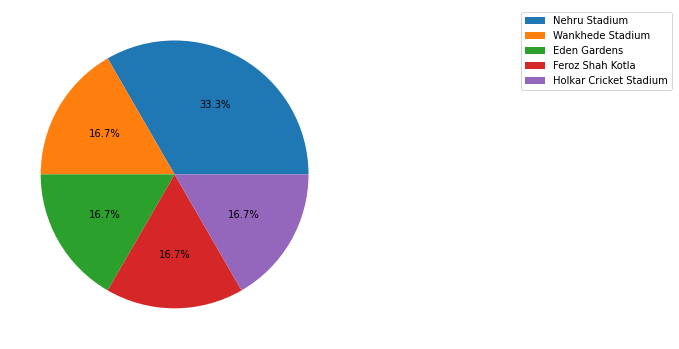

Winner:  Sunrisers Hyderabad


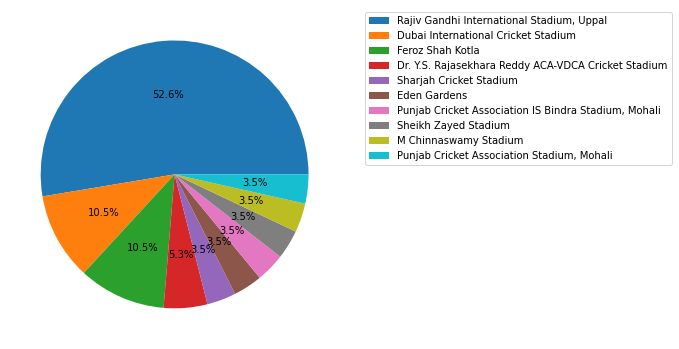

Winner:  Rising Pune Supergiants


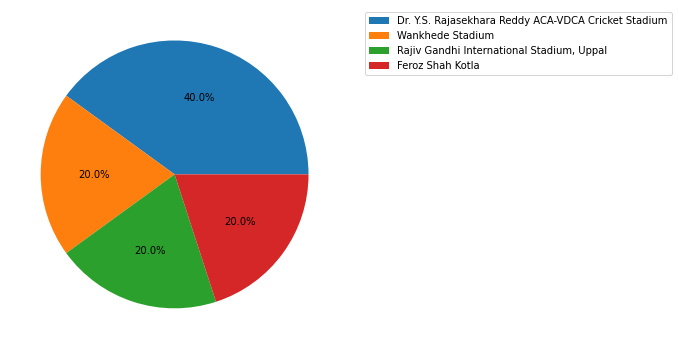

Winner:  Gujarat Lions


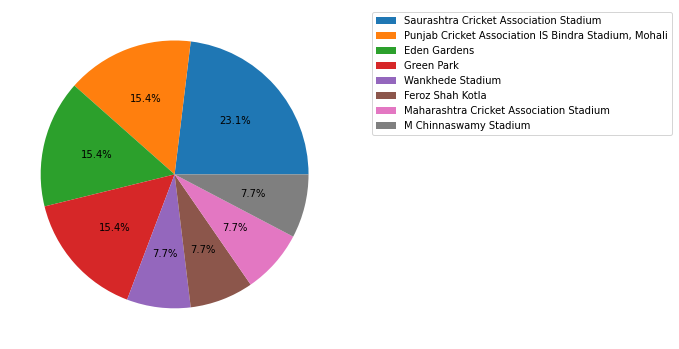

Winner:  Rising Pune Supergiant


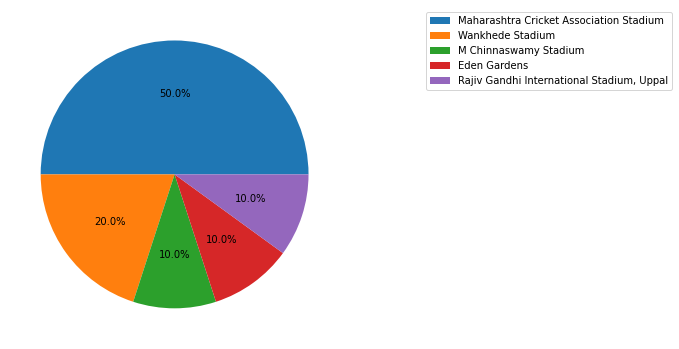

Winner:  Delhi Capitals


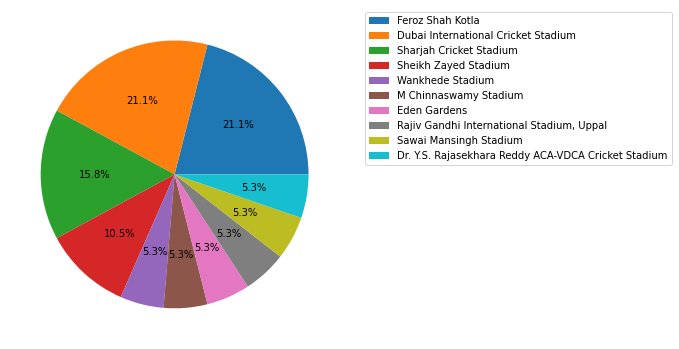

In [64]:
for i in df["winner"].unique():  # Get the each team from winner column
  print("Winner: ", i)
  plt.figure(figsize=(6,10))     # Adjusting the figure size
  plt.pie(df[df["winner"] == i]["venue"].value_counts()[:10], autopct = "%1.1f%%")
  plt.legend(df[df["winner"] == i]["venue"].value_counts()[:10].index, bbox_to_anchor = (2,1), loc = "upper right")
  plt.show()

**Question_14:Does playing at home grounds has any impact on winning the game?**

In [65]:
# To get home ground of each team
homeground={}
for i in df.winner.unique():
    homeground[i]=df[df.winner==i].venue.value_counts().head(1).index[0]


In [66]:
homeground

{'Kolkata Knight Riders': 'Eden Gardens',
 'Chennai Super Kings': 'MA Chidambaram Stadium, Chepauk',
 'Delhi Daredevils': 'Feroz Shah Kotla',
 'Royal Challengers Bangalore': 'M Chinnaswamy Stadium',
 'Rajasthan Royals': 'Sawai Mansingh Stadium',
 'Kings XI Punjab': 'Punjab Cricket Association Stadium, Mohali',
 'Deccan Chargers': 'Barabati Stadium',
 'Mumbai Indians': 'Wankhede Stadium',
 'Pune Warriors': 'Subrata Roy Sahara Stadium',
 'Kochi Tuskers Kerala': 'Nehru Stadium',
 'Sunrisers Hyderabad': 'Rajiv Gandhi International Stadium, Uppal',
 'Rising Pune Supergiants': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Gujarat Lions': 'Saurashtra Cricket Association Stadium',
 'Rising Pune Supergiant': 'Maharashtra Cricket Association Stadium',
 'Delhi Capitals': 'Feroz Shah Kotla'}

In [67]:
# Gives number of matches played by each team on their homeground
matches_played_homeground={}
for i in homeground:
    matches_played_homeground[i]=len(df[df.venue==homeground[i]])

In [68]:
matches_played_homeground 

{'Kolkata Knight Riders': 77,
 'Chennai Super Kings': 57,
 'Delhi Daredevils': 73,
 'Royal Challengers Bangalore': 77,
 'Rajasthan Royals': 47,
 'Kings XI Punjab': 35,
 'Deccan Chargers': 7,
 'Mumbai Indians': 73,
 'Pune Warriors': 17,
 'Kochi Tuskers Kerala': 5,
 'Sunrisers Hyderabad': 64,
 'Rising Pune Supergiants': 13,
 'Gujarat Lions': 10,
 'Rising Pune Supergiant': 21,
 'Delhi Capitals': 73}

In [69]:
# Gives the number of matches won by each team on their homeground
matches_won_homeground={}
for i in homeground:
    matches_won_homeground[i]=len(df.loc[(df['venue']==homeground[i]) & (df['winner']==i)])

In [70]:
matches_won_homeground

{'Kolkata Knight Riders': 45,
 'Chennai Super Kings': 40,
 'Delhi Daredevils': 27,
 'Royal Challengers Bangalore': 37,
 'Rajasthan Royals': 32,
 'Kings XI Punjab': 18,
 'Deccan Chargers': 3,
 'Mumbai Indians': 42,
 'Pune Warriors': 4,
 'Kochi Tuskers Kerala': 2,
 'Sunrisers Hyderabad': 30,
 'Rising Pune Supergiants': 2,
 'Gujarat Lions': 3,
 'Rising Pune Supergiant': 5,
 'Delhi Capitals': 4}

In [71]:
# Success percentage of each team on their homeground
success_percentage={}
for i in homeground:
    success_percentage[i]=(matches_won_homeground[i]/matches_played_homeground [i])*100
success_percentage

{'Kolkata Knight Riders': 58.44155844155844,
 'Chennai Super Kings': 70.17543859649122,
 'Delhi Daredevils': 36.986301369863014,
 'Royal Challengers Bangalore': 48.05194805194805,
 'Rajasthan Royals': 68.08510638297872,
 'Kings XI Punjab': 51.42857142857142,
 'Deccan Chargers': 42.857142857142854,
 'Mumbai Indians': 57.534246575342465,
 'Pune Warriors': 23.52941176470588,
 'Kochi Tuskers Kerala': 40.0,
 'Sunrisers Hyderabad': 46.875,
 'Rising Pune Supergiants': 15.384615384615385,
 'Gujarat Lions': 30.0,
 'Rising Pune Supergiant': 23.809523809523807,
 'Delhi Capitals': 5.47945205479452}

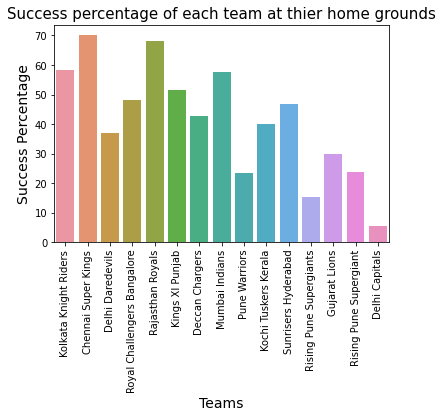

In [72]:
# assigning values to the variables
teams = list(success_percentage.keys())
success_percentage = list(success_percentage.values())


# plotting barplot of Success_percentage with above values
sns.barplot(teams,success_percentage)
plt.xticks(rotation=90)
plt.xlabel("Teams", fontsize = 14)
plt.ylabel("Success Percentage", fontsize = 14)
plt.title("Success percentage of each team at thier home grounds", fontsize = 15)
plt.show()

- Teams have more proportion of winning matches when they play at their home ground as they are playing more matches at their home ground so There is no clear evident to state that playing at home ground is advantage to all team
- Chennai Super Kings has highest Success rate of winning at home ground followed by Rajasthan Royals.


**Question_15:Does winning toss increases the chances of winning the match?**

Possibility of winning the match after winning toss:  51.48 %


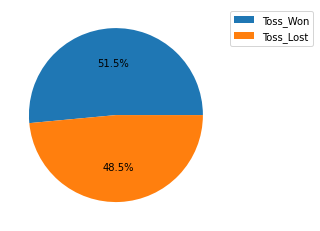

In [73]:
x = len(df[df["winner"]== df["toss_winner"]]) # Number of matches won by teams when they won toss
y = len(df)  # Total number of matches
print("Possibility of winning the match after winning toss: ", round(x/y*100, 2),"%")
plt.pie([x, y-x], autopct = "%1.1f%%")
plt.legend(["Toss_Won","Toss_Lost"], bbox_to_anchor = (1,1,))
plt.show()

Winning percentage of team when the team elect to bat first:  45.45454545454545


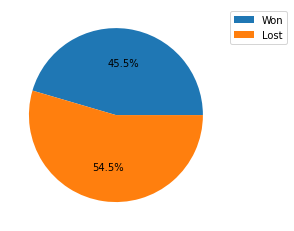

In [74]:
# When won the toss and elected to Bat first
x_bat_winner = len(df[(df["winner"]==df["toss_winner"]) & (df["toss_decision"]== "bat")])
y_bat = len(df[df["toss_decision"] == "bat"])
print("Winning percentage of team when the team elect to bat first: ",x_bat_winner/y_bat*100)

plt.pie([x_bat_winner, y_bat -x_bat_winner ], autopct = "%1.1f%%")
plt.legend(["Won", "Lost"], bbox_to_anchor = (1,1))
plt.show()

Winning percentage of team when the team elect to field first:  55.375253549695735


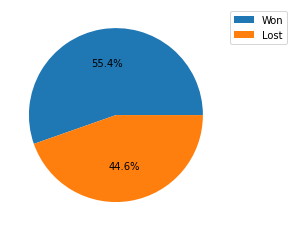

In [75]:
# When won the toss and elected to Field first
x_field_winner = len(df[(df["winner"]==df["toss_winner"]) & (df["toss_decision"]== "field")])
y_field = len(df[df["toss_decision"] == "field"])
print("Winning percentage of team when the team elect to field first: ",x_field_winner/y_field*100)

plt.pie([x_field_winner, y_field - x_field_winner ], autopct = "%1.1f%%")
plt.legend(["Won", "Lost"], bbox_to_anchor = (1,1), loc = "top right")
plt.show()


- 1.Chances of winning game is very slightly more for toss winning team
- 2.Toss winners who choose to field first have more chances to win the match than the ones who choose to bat first.

## Inferences

- According to data set there are 812 matches played by 15 teams in 35 venues
- Mumbai Indians has played more matches and won highest number of matches 
- Teams winning toss has very little edge over the toss lossing team, but the team which win the toss and decides to field first has more probability to win the match
- Mumbai Indians has won the match with largest margin 
- Chennai Super Kings has highest percentage of winning rate at home ground, that shows they analyze the 
ground conditions well and play with proper 11 players 
- Teams have more proportion of winning matches when they play at their home ground as they are playing more matches at their home ground, so there is no clear evident to state that playing at home ground is advantage to all team
- Ab de Villiers has won highest number of player of the match awards followed by CH Gayle both belong to Royal Challengers Benagaluru but they failed to make their team lift the trophy , it shows that in IPL the team which is getting equal contibution from each player is more successfull 